In [1]:
import pandas as pd

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [39]:
xlsx = pd.ExcelFile(r'C:\Users\trand\Downloads\LaptopDataset.xlsx')
data = pd.read_excel(xlsx, sheet_name='CustomerProfile')

In [40]:
data.head(2)

,KH_ID,GioiTinh,QueQuan,NamHocThu,ChuyenNganh,NgheNghiepGiaDinh,ChiTieuHangThang,ThoiGianSuDung,MucDichSuDungLaptop,MucDoHaiLong,YeuToThuongHieuSP,YeuToCauHinh,YeuToTocDoXuLy,YeuToGia,YeuToThietKe,YeuToUyTinNhaBanle,YeuToBaoMat,YeuToBaoHanh,YeuToKhuyenMai
0,CTM10164,Nam,Quảng Trị,Năm 2,Luật kinh tế,Nông dân,Từ 1.500.000 đến 3.000.000,Từ 6 tháng - 1 năm,"Học tập, Làm việc, Chơi game, Giải trí (xem ph...",5,3,3,3,3,3,3,3,3,3
1,CTM10246,Nam,Đà Nẵng,Năm 4,Hệ thống thông tin quản lý,Kinh doanh tự do,Từ 3.000.000 đến 5.000.000,Trên 2 năm,"Học tập, Làm việc, Chơi game",4,4,5,5,4,3,4,1,5,5


In [41]:
data.count()
data.isnull().sum()
data.dtypes

KH_ID                  object
GioiTinh               object
QueQuan                object
NamHocThu              object
ChuyenNganh            object
NgheNghiepGiaDinh      object
ChiTieuHangThang       object
ThoiGianSuDung         object
MucDichSuDungLaptop    object
MucDoHaiLong            int64
YeuToThuongHieuSP       int64
YeuToCauHinh            int64
YeuToTocDoXuLy          int64
YeuToGia                int64
YeuToThietKe            int64
YeuToUyTinNhaBanle      int64
YeuToBaoMat             int64
YeuToBaoHanh            int64
YeuToKhuyenMai          int64
dtype: object

In [42]:
data_2 = data.drop(columns='KH_ID')

In [43]:
# Step 2: One-Hot Encoding for All Features
data_2= pd.get_dummies(data_2, drop_first=True)

In [55]:
data_2.head(2)

,KH_ID,GioiTinh_Nữ,QueQuan_Gia Lai,QueQuan_Hà Nội,QueQuan_Hà Tĩnh,QueQuan_Hồ Chí Minh,QueQuan_Kon Tum,QueQuan_Lâm Đồng,QueQuan_Nghệ An,QueQuan_Phú Yên,...,"MucDichSuDungLaptop_Học tập, Làm việc, Chơi game, Giải trí (xem phim, nghe nhạc, lướt web), Khác","MucDichSuDungLaptop_Học tập, Làm việc, Chơi game, Khác","MucDichSuDungLaptop_Học tập, Làm việc, Giải trí (xem phim, nghe nhạc, lướt web)","MucDichSuDungLaptop_Học tập, Làm việc, Giải trí (xem phim, nghe nhạc, lướt web), Khác","MucDichSuDungLaptop_Học tập, Làm việc, Khác",MucDichSuDungLaptop_Khác,MucDichSuDungLaptop_Làm việc,"MucDichSuDungLaptop_Làm việc, Chơi game","MucDichSuDungLaptop_Làm việc, Chơi game, Giải trí (xem phim, nghe nhạc, lướt web)","MucDichSuDungLaptop_Làm việc, Giải trí (xem phim, nghe nhạc, lướt web)"
0,CTM10164,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,CTM10246,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
data_2.insert(0, 'KH_ID', data['KH_ID'])

In [46]:
columns_to_drop = ['MucDoHaiLong', 'YeuToThuongHieuSP', 'YeuToCauHinh', 'YeuToTocDoXuLy', 'YeuToGia', 'YeuToThietKe', 'YeuToUyTinNhaBanle', 'YeuToBaoMat', 'YeuToBaoHanh', 'YeuToKhuyenMai']
data_2 = data_2.drop(columns=columns_to_drop)

In [56]:
data_2.to_excel('dummies.xlsx', index=False)

# Clustering

In [ ]:
data_2=data_2.drop(columns='KH_ID')

In [63]:
# cus want to divine in to 6 clusters 
k_optimal = 6

In [64]:
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
data_2['Cluster'] = kmeans.fit_predict(data_2)

c:\Users\trand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [66]:
# Analyze the clusters and their characteristics
cluster_means = data_2.groupby('Cluster').mean()

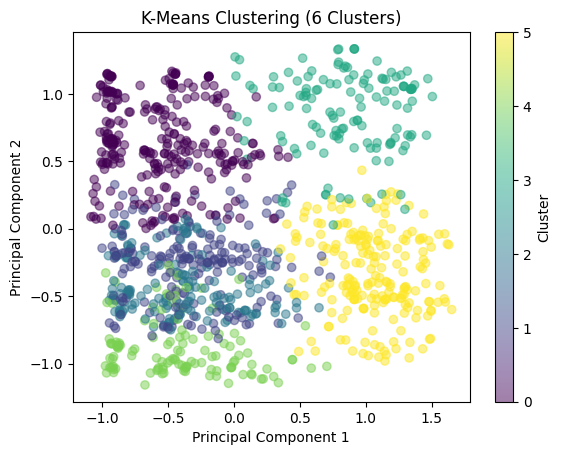

In [68]:
# Use PCA for dimensionality reduction
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_2.drop(['Cluster'], axis=1))

# Plotting the clusters
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data_2['Cluster'], cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering (6 Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [72]:
# Group the data by the 'Cluster' column and calculate mean values
cluster_means = data_2.groupby('Cluster').mean()

# Display the mean values for each feature within each cluster
print(cluster_means)


         GioiTinh_Nữ  QueQuan_Gia Lai  QueQuan_Hà Nội  QueQuan_Hà Tĩnh  \
Cluster                                                                  
0           0.702128         0.042553        0.148936         0.060284   
1           0.695000         0.100000        0.095000         0.055000   
2           0.681818         0.045455        0.142857         0.032468   
3           0.443609         0.060150        0.060150         0.022556   
4           0.642276         0.024390        0.154472         0.048780   
5           0.350962         0.052885        0.062500         0.038462   

         QueQuan_Hồ Chí Minh  QueQuan_Kon Tum  QueQuan_Lâm Đồng  \
Cluster                                                           
0                   0.081560         0.007092          0.000000   
1                   0.130000         0.025000          0.000000   
2                   0.123377         0.019481          0.006494   
3                   0.210526         0.045113          0.007519   
4    

In [75]:
output_excel_path = r'C:\Users\trand\Documents\study\university\23_24_ki1\warehouse\python\clusters_means.csv'
cluster_means.to_csv(output_excel_path, index=True)

# Analysis

In [78]:
analysis = pd.read_excel(r'C:\Users\trand\Documents\study\university\23_24_ki1\warehouse\python\clusters_means.xlsx')

In [80]:
analysis

,Cluster,GioiTinh_Nữ,QueQuan_Gia Lai,QueQuan_Hà Nội,QueQuan_Hà Tĩnh,QueQuan_Hồ Chí Minh,QueQuan_Kon Tum,QueQuan_Lâm Đồng,QueQuan_Nghệ An,QueQuan_Phú Yên,...,"MucDichSuDungLaptop_Học tập, Làm việc, Chơi game, Giải trí (xem phim, nghe nhạc, lướt web), Khác","MucDichSuDungLaptop_Học tập, Làm việc, Chơi game, Khác","MucDichSuDungLaptop_Học tập, Làm việc, Giải trí (xem phim, nghe nhạc, lướt web)","MucDichSuDungLaptop_Học tập, Làm việc, Giải trí (xem phim, nghe nhạc, lướt web), Khác","MucDichSuDungLaptop_Học tập, Làm việc, Khác",MucDichSuDungLaptop_Khác,MucDichSuDungLaptop_Làm việc,"MucDichSuDungLaptop_Làm việc, Chơi game","MucDichSuDungLaptop_Làm việc, Chơi game, Giải trí (xem phim, nghe nhạc, lướt web)","MucDichSuDungLaptop_Làm việc, Giải trí (xem phim, nghe nhạc, lướt web)"
0,0,0.702128,0.042553,0.148936,0.060284,0.081560,0.007092,0.000000,0.035461,0.007092,...,0.021277,0.000000,0.212766,0.017730,0.000000,0.000000,0.007092,0.000000,0.000000,0.014184
1,1,0.695000,0.100000,0.095000,0.055000,0.130000,0.025000,0.000000,0.035000,0.010000,...,0.050000,0.000000,0.150000,0.015000,0.000000,0.000000,0.040000,0.000000,0.010000,0.000000
2,2,0.681818,0.045455,0.142857,0.032468,0.123377,0.019481,0.006494,0.090909,0.006494,...,0.006494,0.000000,0.175325,0.012987,0.000000,0.006494,0.012987,0.000000,0.006494,0.000000
3,3,0.443609,0.060150,0.060150,0.022556,0.210526,0.045113,0.007519,0.037594,0.007519,...,0.022556,0.007519,0.203008,0.007519,0.000000,0.007519,0.000000,0.000000,0.000000,0.015038
4,4,0.642276,0.024390,0.154472,0.048780,0.178862,0.024390,0.000000,0.056911,0.008130,...,0.016260,0.000000,0.203252,0.016260,0.000000,0.000000,0.000000,0.000000,0.000000,0.008130
5,5,0.350962,0.052885,0.062500,0.038462,0.312500,0.004808,0.000000,0.019231,0.014423,...,0.086538,0.000000,0.129808,0.009615,0.004808,0.004808,0.024038,0.024038,0.009615,0.019231


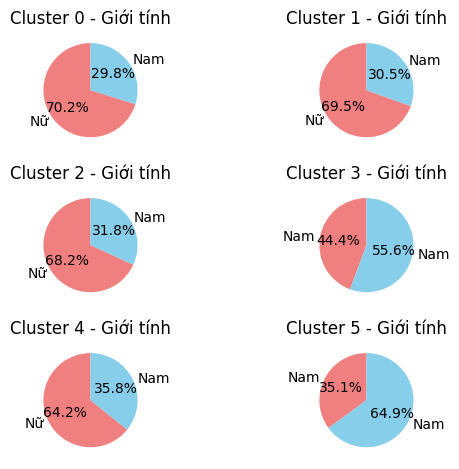

In [94]:
import matplotlib.pyplot as plt

# Tạo danh sách các cụm
clusters = analysis['Cluster']

# Số cột và số hàng cho subplot
num_cols = 2
num_rows = (len(clusters) + 1) // num_cols

# Vẽ biểu đồ tròn cho mỗi cụm
for i, cluster in enumerate(clusters):
    # Lấy tỷ lệ giới tính nữ từ cột tương ứng
    female_percentage = analysis.at[cluster, 'GioiTinh_Nữ']

    # Phân loại giới tính dựa trên ngưỡng 0.5
    gender_label = 'Nữ' if female_percentage > 0.5 else 'Nam'

    # Đặt subplot cho mỗi cụm
    plt.subplot(num_rows, num_cols, i + 1)

    # Vẽ biểu đồ tròn
    plt.pie([female_percentage, 1 - female_percentage], labels=[gender_label, 'Nam'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
    plt.title(f'Cluster {cluster} - Giới tính')

# Đảm bảo không có lỗ trống trong layout
plt.tight_layout()

# Hiển thị tất cả biểu đồ
plt.show()


In [96]:
# Tìm tất cả các cột có tên bắt đầu bằng "QueQuan_ten"
que_quan_columns = [col for col in analysis.columns if col.startswith('QueQuan_')]
que_quan_columns

['QueQuan_Gia Lai',
 'QueQuan_Hà Nội',
 'QueQuan_Hà Tĩnh',
 'QueQuan_Hồ Chí Minh',
 'QueQuan_Kon Tum',
 'QueQuan_Lâm Đồng',
 'QueQuan_Nghệ An',
 'QueQuan_Phú Yên',
 'QueQuan_Quảng Bình',
 'QueQuan_Quảng Nam',
 'QueQuan_Quảng Ngãi',
 'QueQuan_Quảng Trị',
 'QueQuan_Thanh Hóa',
 'QueQuan_Thừa Thiên Huế',
 'QueQuan_Đà Nẵng',
 'QueQuan_Đắk Lắk',
 'QueQuan_Đắk Nông']

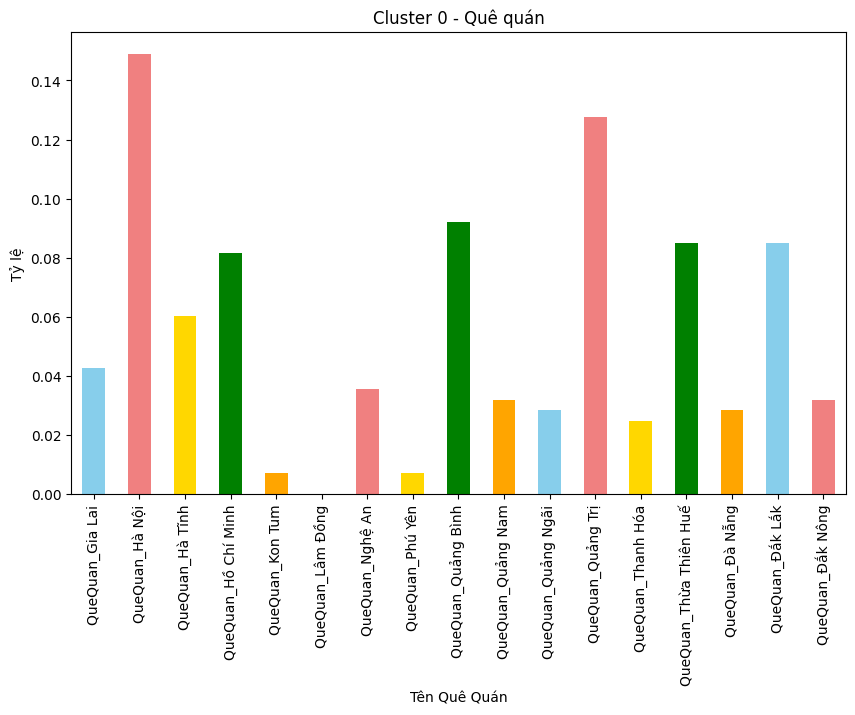

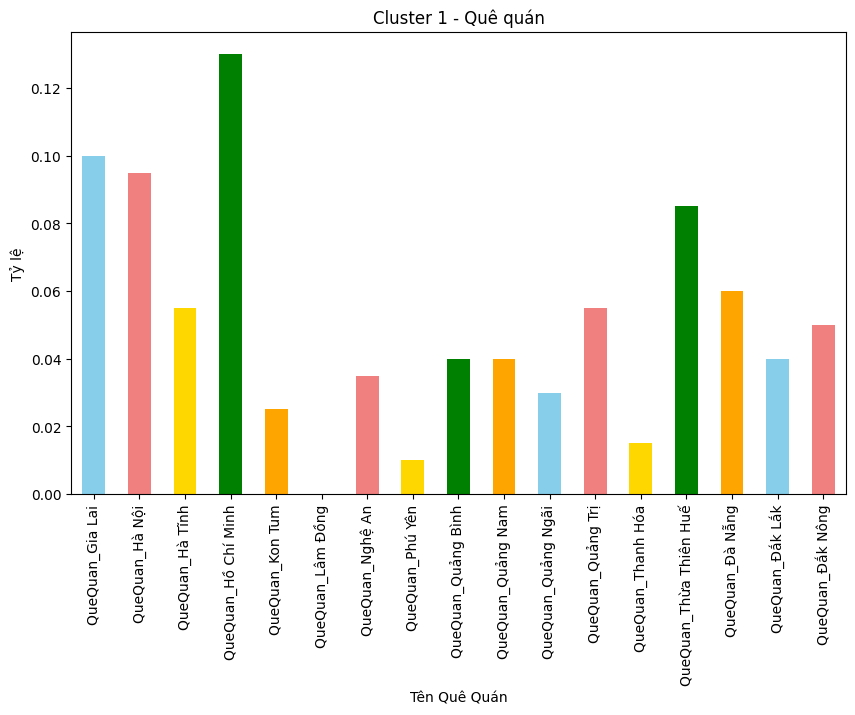

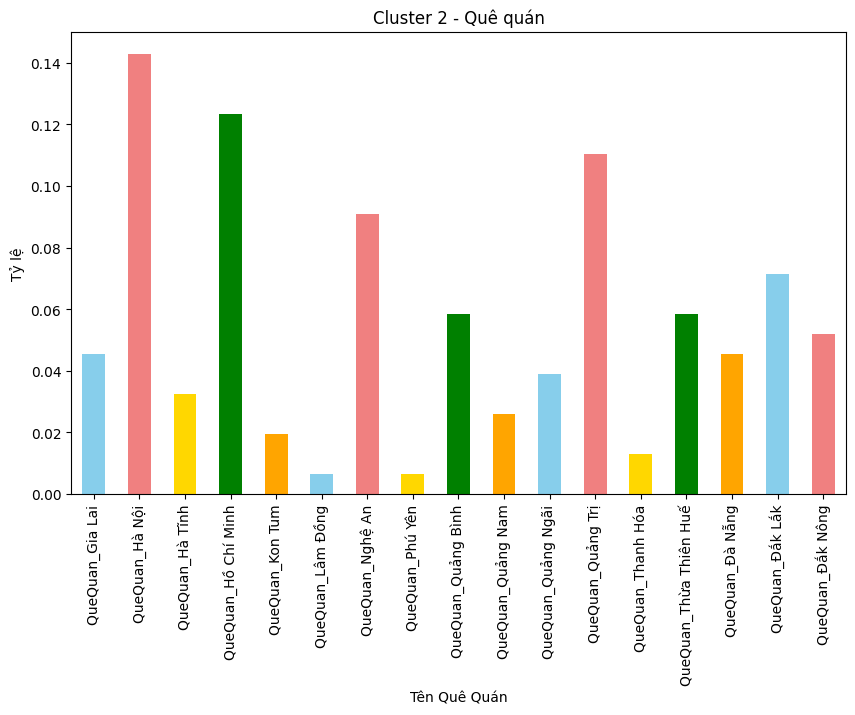

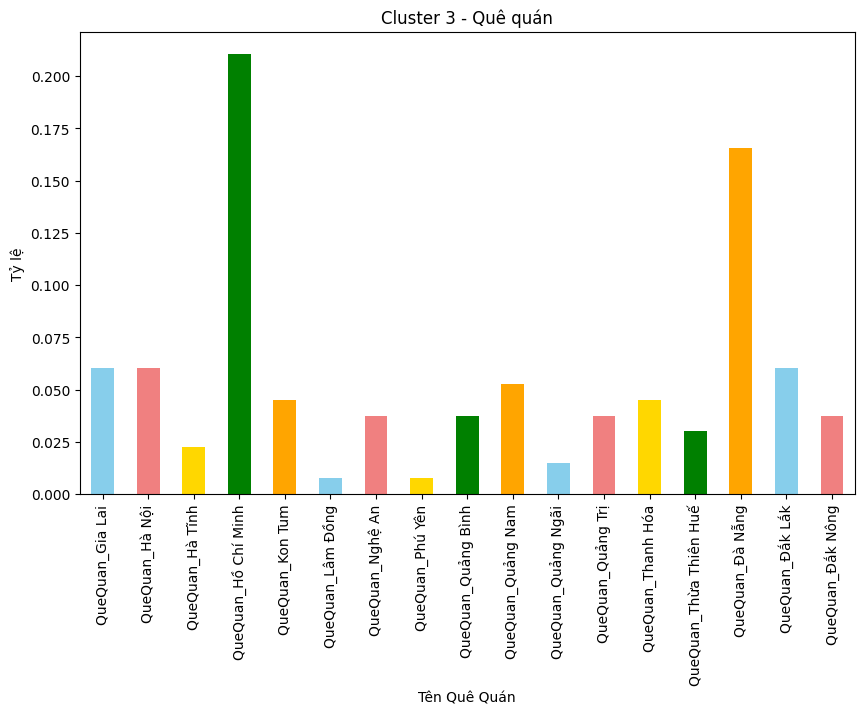

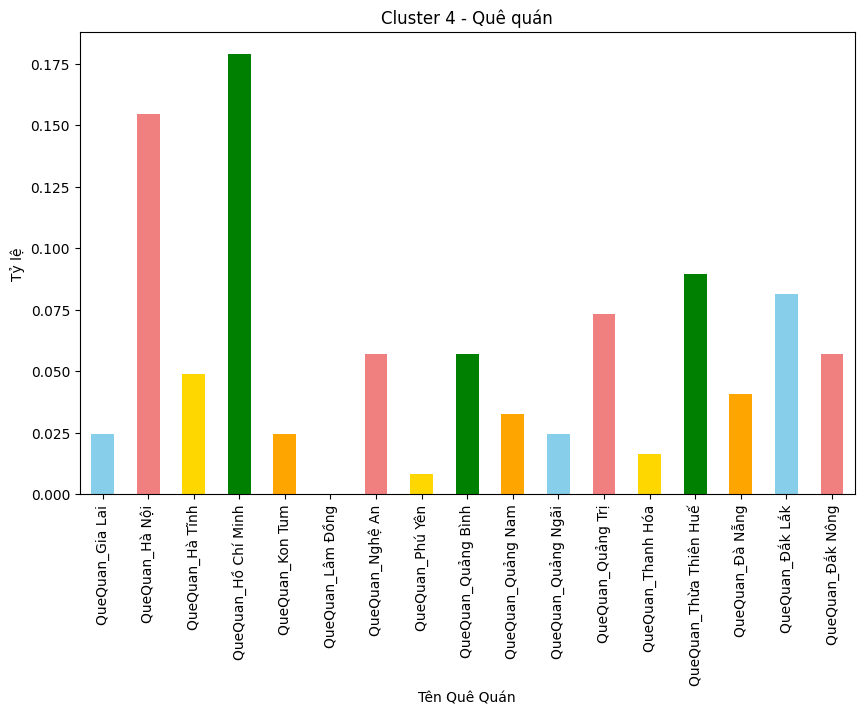

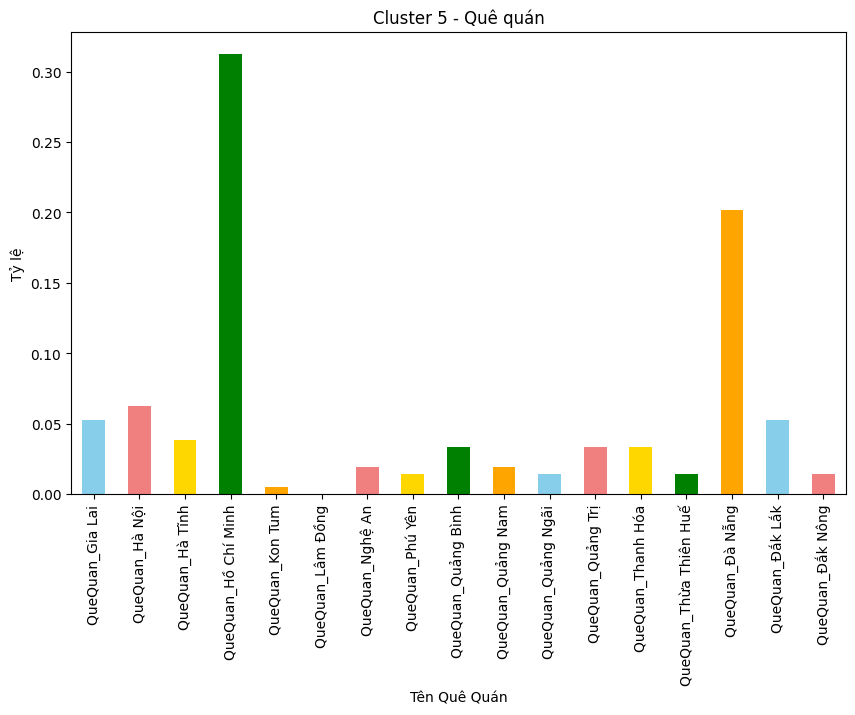

In [108]:
# Kích thước cho mỗi biểu đồ
fig_width = 10  # Điều chỉnh theo ý muốn
fig_height = 6  # Điều chỉnh theo ý muốn

# Vẽ biểu đồ cột cho mỗi cụm
for i, cluster in enumerate(clusters):
    # Lấy dữ liệu quê quán từ các cột tương ứng
    que_quan_data = analysis.loc[cluster, que_quan_columns]

    # Tạo một biểu đồ mới với kích thước tùy chỉnh
    plt.figure(figsize=(fig_width, fig_height))

    # Vẽ biểu đồ cột
    que_quan_data.plot(kind='bar', color=['skyblue', 'lightcoral', 'gold', 'green', 'orange'])  # Thay màu sắc tùy chọn
    plt.title(f'Cluster {cluster} - Quê quán')
    plt.xlabel('Tên Quê Quán')
    plt.ylabel('Tỷ lệ')

    # Hiển thị biểu đồ
    plt.show()

In [110]:
# Tìm tất cả các cột có tên chung "NamHocThu_"
nam_hoc_thu_columns = [col for col in analysis.columns if 'NamHocThu_' in col]
nam_hoc_thu_columns

['NamHocThu_Năm 2', 'NamHocThu_Năm 3', 'NamHocThu_Năm 4']

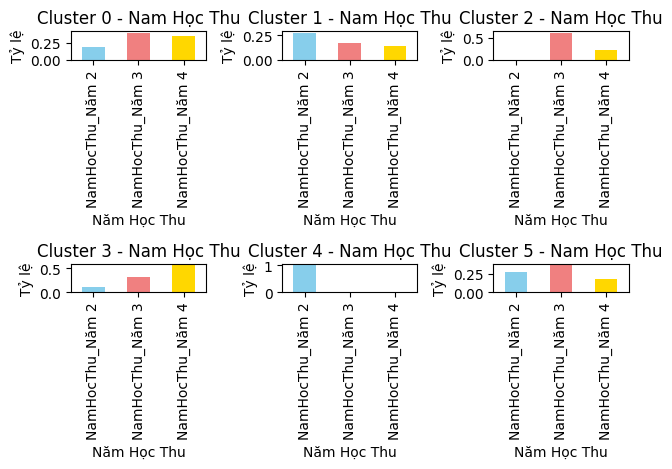

In [113]:
# Số cột và số hàng cho subplot
num_cols = 3
num_rows = (len(clusters) + 1) // num_cols

# Vẽ biểu đồ cột cho mỗi cụm
for i, cluster in enumerate(clusters):
    # Lấy dữ liệu NamHocThu từ các cột tương ứng
    nam_hoc_thu_data = analysis.loc[cluster, nam_hoc_thu_columns]

    # Đặt subplot cho mỗi cụm
    plt.subplot(num_rows, num_cols, i + 1)

    # Vẽ biểu đồ cột
    nam_hoc_thu_data.plot(kind='bar', color=['skyblue', 'lightcoral', 'gold', 'green', 'orange'])  # Thay màu sắc tùy chọn
    plt.title(f'Cluster {cluster} - Nam Học Thu')
    plt.xlabel('Năm Học Thu')
    plt.ylabel('Tỷ lệ')

# Đảm bảo không có lỗ trống trong layout
plt.tight_layout()

# Hiển thị tất cả biểu đồ
plt.show()

In [116]:
# Tìm tất cả các cột có tên chung "ChuyenNganh_"
chuyen_nganh_columns = [col for col in analysis.columns if 'ChuyenNganh_' in col]

# Duyệt qua từng cụm
for cluster in clusters:
    # Lấy dữ liệu chuyên ngành từ các cột tương ứng
    chuyen_nganh_data = analysis.loc[cluster, chuyen_nganh_columns]

    # Xác định chỉ mục của giá trị lớn nhất (chuyên ngành có tỷ lệ cao nhất)
    max_index = chuyen_nganh_data.idxmax()

    # In ra thông tin về chuyên ngành có tỷ lệ cao nhất
    print(f'Cluster {cluster} - Chuyên ngành cao nhất: {max_index}, Tỷ lệ: {chuyen_nganh_data[max_index]}')

Cluster 0 - Chuyên ngành cao nhất: ChuyenNganh_Thương mại, Tỷ lệ: 0.1808510638297872
Cluster 1 - Chuyên ngành cao nhất: ChuyenNganh_Thương mại, Tỷ lệ: 0.115
Cluster 2 - Chuyên ngành cao nhất: ChuyenNganh_Kế toán, Tỷ lệ: 0.1493506493506493
Cluster 3 - Chuyên ngành cao nhất: ChuyenNganh_Thương mại, Tỷ lệ: 0.2105263157894737
Cluster 4 - Chuyên ngành cao nhất: ChuyenNganh_Ngoại thương, Tỷ lệ: 0.1138211382113821
Cluster 5 - Chuyên ngành cao nhất: ChuyenNganh_Ngoại thương, Tỷ lệ: 0.25


In [120]:
# Tìm tất cả các cột có tên chung "ChuyenNganh_", "QueQuan_ten", "NamHocThu_"
chuyen_nganh_columns = [col for col in analysis.columns if 'ChuyenNganh_' in col]
que_quan_column = [col for col in analysis.columns if 'QueQuan_' in col]
nam_hoc_thu_columns = [col for col in analysis.columns if 'NamHocThu_' in col]

# Tìm tất cả các cột có tên chung "NgheNghiepGiaDinh_"
nghe_nghiep_gia_dinh_columns = [col for col in analysis.columns if 'NgheNghiepGiaDinh_' in col]

# Tìm tất cả các cột có tên chung "ChiTieuHangThang_"
chi_tieu_hang_thang_columns = [col for col in analysis.columns if 'ChiTieuHangThang_' in col]

# Tìm tất cả các cột có tên chung "ThoiGianSuDung_"
thoi_gian_su_dung_columns = [col for col in analysis.columns if 'ThoiGianSuDung_' in col]

# Tìm tất cả các cột có tên chung "MucDichSuDungLaptop_"
muc_dich_su_dung_laptop_columns = [col for col in analysis.columns if 'MucDichSuDungLaptop_' in col]

# Duyệt qua từng cụm
for cluster in clusters:
    # Lấy dữ liệu từ các cột tương ứng
    chuyen_nganh_data = analysis.loc[cluster, chuyen_nganh_columns]
    que_quan_data = analysis.loc[cluster, que_quan_column]
    nam_hoc_thu_data = analysis.loc[cluster, nam_hoc_thu_columns]
    
    nghe_nghiep_gia_dinh_data = analysis.loc[cluster, nghe_nghiep_gia_dinh_columns]
    chi_tieu_hang_thang_data = analysis.loc[cluster, chi_tieu_hang_thang_columns]
    thoi_gian_su_dung_data = analysis.loc[cluster, thoi_gian_su_dung_columns]
    muc_dich_su_dung_laptop_data = analysis.loc[cluster, muc_dich_su_dung_laptop_columns]

    # Xác định chỉ mục của giá trị lớn nhất trong mỗi cột
    max_chuyen_nganh_index = chuyen_nganh_data.idxmax()
    max_que_quan_index = que_quan_data.idxmax()
    max_nam_hoc_thu_index = nam_hoc_thu_data.idxmax()
    
    max_nghe_nghiep_gia_dinh_index = nghe_nghiep_gia_dinh_data.idxmax()
    max_chi_tieu_hang_thang_index = chi_tieu_hang_thang_data.idxmax()
    max_thoi_gian_su_dung_index = thoi_gian_su_dung_data.idxmax()
    max_muc_dich_su_dung_laptop_index = muc_dich_su_dung_laptop_data.idxmax()

    # In ra thông tin về giá trị lớn nhất trong mỗi cột
    print(f'Cluster {cluster} - Chuyen Nganh cao nhất: {max_chuyen_nganh_index}, Tỷ lệ: {chuyen_nganh_data[max_chuyen_nganh_index]}')
    print(f'Cluster {cluster} - Que Quan cao nhất: {max_que_quan_index}, Tỷ lệ: {que_quan_data[max_que_quan_index]}')
    print(f'Cluster {cluster} - Nam Hoc Thu cao nhất: {max_nam_hoc_thu_index}, Tỷ lệ: {nam_hoc_thu_data[max_nam_hoc_thu_index]}')
    
    print(f'Cluster {cluster} - Nghe Nghiep Gia Dinh cao nhất: {max_nghe_nghiep_gia_dinh_index}, Tỷ lệ: {nghe_nghiep_gia_dinh_data[max_nghe_nghiep_gia_dinh_index]}')
    print(f'Cluster {cluster} - Chi Tieu Hang Thang cao nhất: {max_chi_tieu_hang_thang_index}, Tỷ lệ: {chi_tieu_hang_thang_data[max_chi_tieu_hang_thang_index]}')
    print(f'Cluster {cluster} - Thoi Gian Su Dung cao nhất: {max_thoi_gian_su_dung_index}, Tỷ lệ: {thoi_gian_su_dung_data[max_thoi_gian_su_dung_index]}')
    print(f'Cluster {cluster} - Muc Dich Su Dung Laptop cao nhất: {max_muc_dich_su_dung_laptop_index}, Tỷ lệ: {muc_dich_su_dung_laptop_data[max_muc_dich_su_dung_laptop_index]}')
    
    # In một dòng trống giữa các cụm
    print('\n')

Cluster 0 - Chuyen Nganh cao nhất: ChuyenNganh_Thương mại, Tỷ lệ: 0.1808510638297872
Cluster 0 - Que Quan cao nhất: QueQuan_Hà Nội, Tỷ lệ: 0.148936170212766
Cluster 0 - Nam Hoc Thu cao nhất: NamHocThu_Năm 3, Tỷ lệ: 0.4042553191489361
Cluster 0 - Nghe Nghiep Gia Dinh cao nhất: NgheNghiepGiaDinh_Nông dân, Tỷ lệ: 0.6524822695035462
Cluster 0 - Chi Tieu Hang Thang cao nhất: ChiTieuHangThang_Từ 1.500.000 đến 3.000.000, Tỷ lệ: 0.8936170212765957
Cluster 0 - Thoi Gian Su Dung cao nhất: ThoiGianSuDung_Trên 2 năm, Tỷ lệ: 0.9929078014184397
Cluster 0 - Muc Dich Su Dung Laptop cao nhất: MucDichSuDungLaptop_Học tập, Làm việc, Tỷ lệ: 0.2659574468085106


Cluster 1 - Chuyen Nganh cao nhất: ChuyenNganh_Thương mại, Tỷ lệ: 0.115
Cluster 1 - Que Quan cao nhất: QueQuan_Hồ Chí Minh, Tỷ lệ: 0.13
Cluster 1 - Nam Hoc Thu cao nhất: NamHocThu_Năm 2, Tỷ lệ: 0.275
Cluster 1 - Nghe Nghiep Gia Dinh cao nhất: NgheNghiepGiaDinh_Nông dân, Tỷ lệ: 0.62
Cluster 1 - Chi Tieu Hang Thang cao nhất: ChiTieuHangThang_Từ 1.500